# Modelos y Simulación - Trabajo Práctico 3

## 1) Proceso de Bernoulli

Es una secuencia de experimentos independientes (el resultado de un ensayo no afecta a los otros), cada uno exactamente con dos resultados posibles:
- Éxito (con probabilidad p)
- Fracaso (con probabilidad 1-p)

### Distribución Binomial

La distribución binomial es un modelo de probabilidad discreta que calcula la probabilidad de obtener un número específico de "éxitos" en un número fijo de pruebas independientes, donde cada prueba tiene solo dos resultados posibles (éxito o fracaso), y la probabilidad de éxito es constante en cada prueba.

Si realizamos n ensayos de Bernoulli, el número de éxitos X sigue una distribución Binomial:

$X \thicksim B(n,p)$

$P(X=k) = C(n,k)*p^k*(1-p)^{n-k}$

Coeficiente Binomial $C(n,k)$: las formas de obtener k éxitos ->
$C(n,k) = \frac{n!}{k! * (n-k)!}$

$p^k$: probabilidad de k éxitos consecutivos

$(1-p)^{n-k}$: probabilidad de (n-k) fracasos consecutivos

k = número de éxitos

n = número de ensayos


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import binom, norm
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Configuración de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## Ejercicio 1: Proceso de Bernoulli - Control de Calidad en una panadería

Una panadería produce medialunas y, históricamente, el 15% salen defectuosas. El gerente quiere analizar la probabilidad de defectuosos en diferentes cantidades de producción usando el proceso de Bernoulli.

In [6]:
# Parámetros del proceso de Bernoulli
p_defecto = 0.15  # Probabilidad de medialuna defectuosa
n_produccion = [10, 50, 100, 200]  # Diferentes tamaños de lote

In [7]:
# Función para simular proceso de Bernoulli
# Simula múltiples repeticiones de un proceso de Bernoulli
def simular_bernoulli(n, p, num_simulaciones=1000):
    """Simula un proceso de Bernoulli"""
    resultados = []
    for _ in range(num_simulaciones):
        ensayos = np.random.binomial(1, p, n)  # se generan n ensayos de Bernoulli
        exitos = np.sum(ensayos)
        resultados.append(exitos)
    return np.array(resultados)

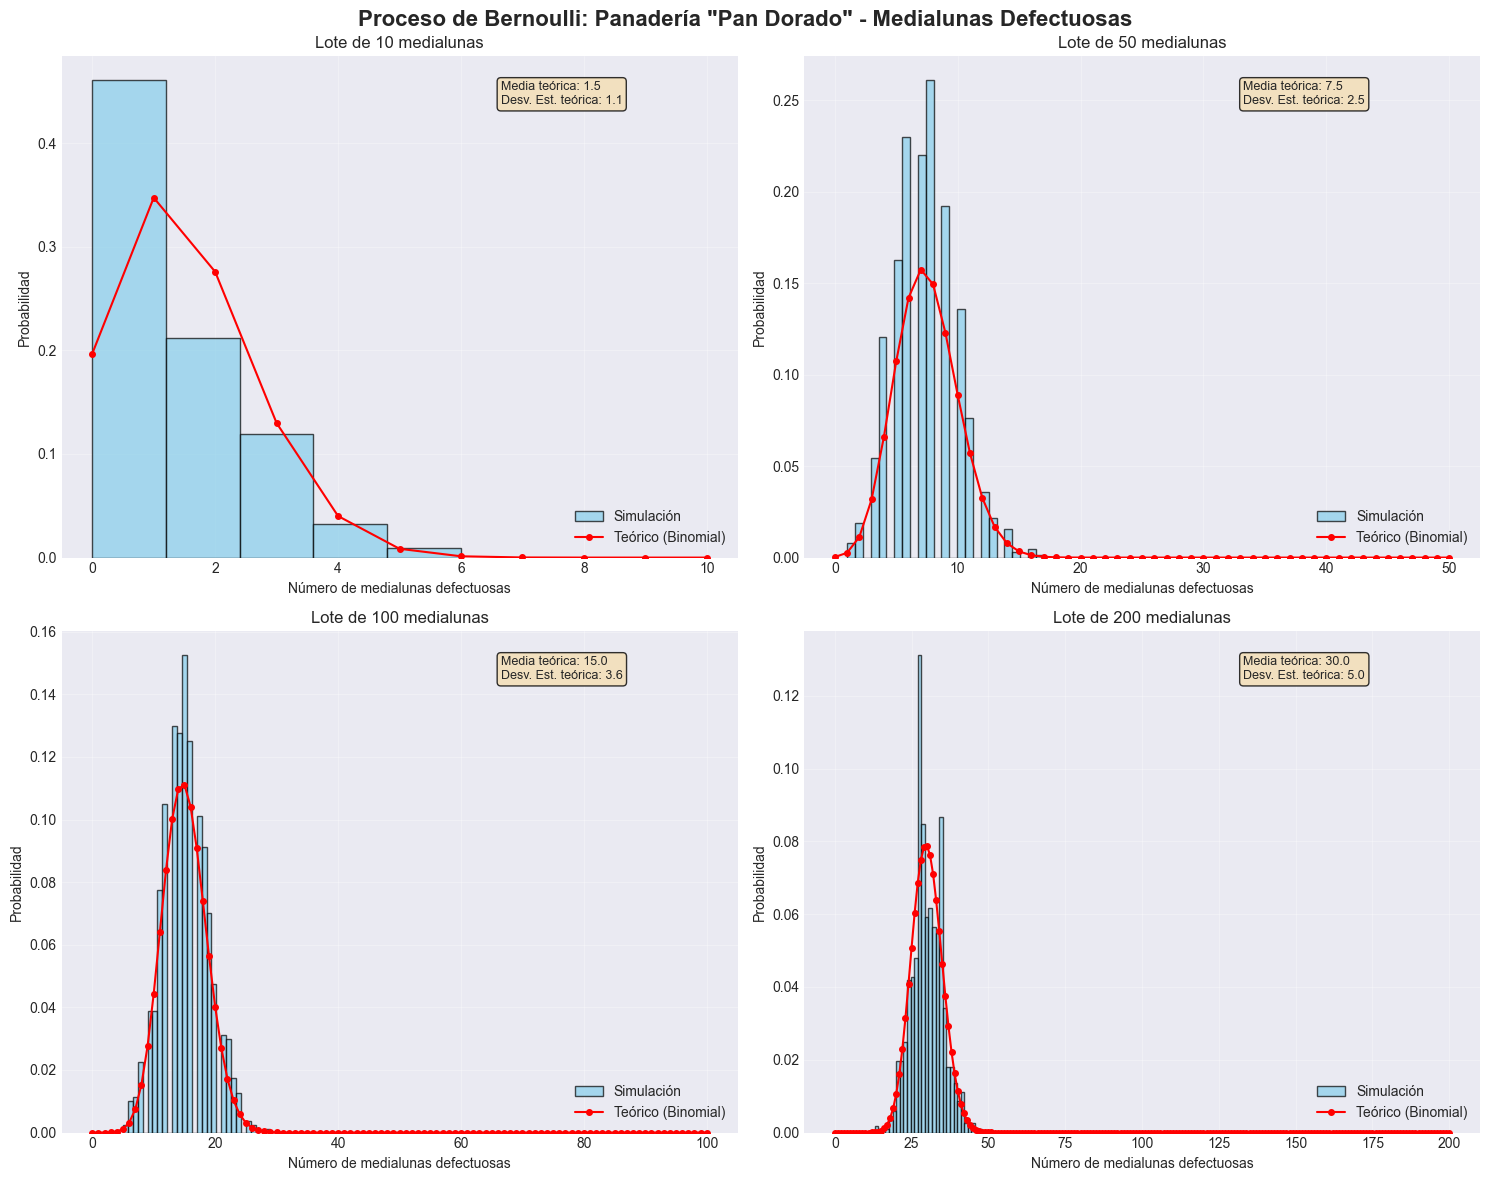

In [ ]:
# Análisis teórico vs simulación
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Proceso de Bernoulli: Panadería "Pan Dorado" - Medialunas Defectuosas', fontsize=16, fontweight='bold')

for i, n in enumerate(n_produccion):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    # Simulación
    # Llama a la función simular_bernoulli para obtener 1000 simulaciones
    # Cada simulación cuenta éxitos en n ensayos con probabilidad p_defecto
    simulacion = simular_bernoulli(n, p_defecto)

    # Distribución teórica (Binomial)
    x_teorico = np.arange(0, n + 1)
    prob_teorica = binom.pmf(x_teorico, n, p_defecto)

    # Gráfico
    ax.hist(simulacion, bins=min(30, n//2), density=True, alpha=0.7,
            color='skyblue', label='Simulación', edgecolor='black')
    ax.plot(x_teorico, prob_teorica, 'ro-', label='Teórico (Binomial)', markersize=4)

    ax.set_title(f'Lote de {n} medialunas')
    ax.set_xlabel('Número de medialunas defectuosas')
    ax.set_ylabel('Probabilidad')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Estadísticas
    media_teorica = n * p_defecto
    varianza_teorica = n * p_defecto * (1 - p_defecto)

    textstr = f'Media teórica: {media_teorica:.1f}\nDesv. Est. teórica: {np.sqrt(varianza_teorica):.1f}'
    ax.text(0.65, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()


Esto permite verificar que las simulaciones convergen a la distribución binomial teórica conforme aumenta el tamaño de la muestra.

In [7]:
# Tabla resumen de resultados
print("\nRESULTADO ANÁLISIS PROCESO DE BERNOULLI:")
print("-" * 60)
df_bernoulli = pd.DataFrame()
for n in n_produccion:
    simulacion = simular_bernoulli(n, p_defecto)
    media_sim = np.mean(simulacion)
    desv_sim = np.std(simulacion)
    media_teorica = n * p_defecto
    desv_teorica = np.sqrt(n * p_defecto * (1 - p_defecto))

    df_temp = pd.DataFrame({
        'Tamaño_Lote': [n],
        'Media_Simulada': [media_sim],
        'Media_Teórica': [media_teorica],
        'Desv_Simulada': [desv_sim],
        'Desv_Teórica': [desv_teorica],
        'Error_Media': [abs(media_sim - media_teorica)],
        'Prob_Cero_Defectos': [binom.pmf(0, n, p_defecto)]
    })
    df_bernoulli = pd.concat([df_bernoulli, df_temp], ignore_index=True)

print(df_bernoulli.round(4))


RESULTADO ANÁLISIS PROCESO DE BERNOULLI:
------------------------------------------------------------
   Tamaño_Lote  Media_Simulada  Media_Teórica  Desv_Simulada  Desv_Teórica  \
0           10           1.505            1.5         1.0973        1.1292   
1           50           7.452            7.5         2.5942        2.5249   
2          100          15.155           15.0         3.6950        3.5707   
3          200          29.938           30.0         4.9731        5.0498   

   Error_Media  Prob_Cero_Defectos  
0        0.005              0.1969  
1        0.048              0.0003  
2        0.155              0.0000  
3        0.062              0.0000  


### Comentarios:

Error_Media (precisión de la simulación): mide qué tan lejos está la simulación de la teoría. El error absoluto aumenta con n (pero el error relativo disminuye)

Error Relativo = Error_Media / Media_Teórica

### Interpretación

Para lotes de 10 medialunas:
- Esperan 1-2 defectuosos en promedio
- Rango normal: 0-4 defectuosos
- 20% de chance de lote perfecto

Para lotes de 200 medialunas:
- Esperan aprox 30 defectuosos en promedio
- Rango normal: 20-40 defectuosos
- Prácticamente imposible tener un lote perfecto

## 2) Ensayos sobre proporciones

Nos permiten hacer afirmaciones o tomar decisiones sobre el porcentaje de algo en una población, basándonos en una muestra.

Busca hacer inferencias sobre el parámetro p (proporción poblacional) basándose en una muestra.

Proporción muestral:
$\hat{p} = \frac{x}{n}$

Distribución de la proporción muestral:
$\hat{p} \thicksim N(p, \sqrt{\frac{p(1-p)}{n}})$

## Ejercicio 2: Efectividad de un medicamento

Una farmacéutica desarrolló un nuevo medicamento para la hipertensión. En ensayos clínicos previos, el medicamento fue efectivo en el 75% de los pacientes. Ahora quieren hacer una prueba con 200 pacientes para confirmar si la proporción de efectividad sigue siendo del 75%.

$H_0: p=0,75$ (la proporción no cambió)

$H_1: p \neq 0,75$ (la proporción cambió)

In [8]:
# Parámetros del ensayo
n_pacientes = 200
p_null = 0.75  # Proporción bajo H₀
alpha = 0.05   # Nivel de significancia

In [9]:
# Función para realizar ensayo de proporciones
def ensayo_proporcion(n, p_null, p_observada, alpha=0.05):
    """Realiza un ensayo de hipótesis para una proporción"""
    # Estadístico de prueba
    z = (p_observada - p_null) / np.sqrt(p_null * (1 - p_null) / n)

    # Valor crítico (prueba bilateral)
    z_critico = stats.norm.ppf(1 - alpha/2)

    # Valor p
    p_valor = 2 * (1 - stats.norm.cdf(abs(z)))

    # Decisión
    rechazar_h0 = abs(z) > z_critico

    return {
        'z_estadistico': z,
        'z_critico': z_critico,
        'p_valor': p_valor,
        'rechazar_h0': rechazar_h0,
        'significativo': p_valor < alpha
    }

In [10]:
# Simular diferentes escenarios de efectividad observada
proporciones_observadas = np.arange(0.60, 0.90, 0.01)
resultados_ensayos = []

for p_obs in proporciones_observadas:
    resultado = ensayo_proporcion(n_pacientes, p_null, p_obs, alpha)
    resultados_ensayos.append({
        'p_observada': p_obs,
        'z_estadistico': resultado['z_estadistico'],
        'p_valor': resultado['p_valor'],
        'significativo': resultado['significativo']
    })

df_ensayos = pd.DataFrame(resultados_ensayos)
df_ensayos.head()

,p_observada,z_estadistico,p_valor,significativo
0,0.60,-4.898979,9.633570e-07,True
1,0.61,-4.572381,4.822134e-06,True
2,0.62,-4.245782,2.178321e-05,True
3,0.63,-3.919184,8.884942e-05,True
4,0.64,-3.592585,3.274139e-04,True


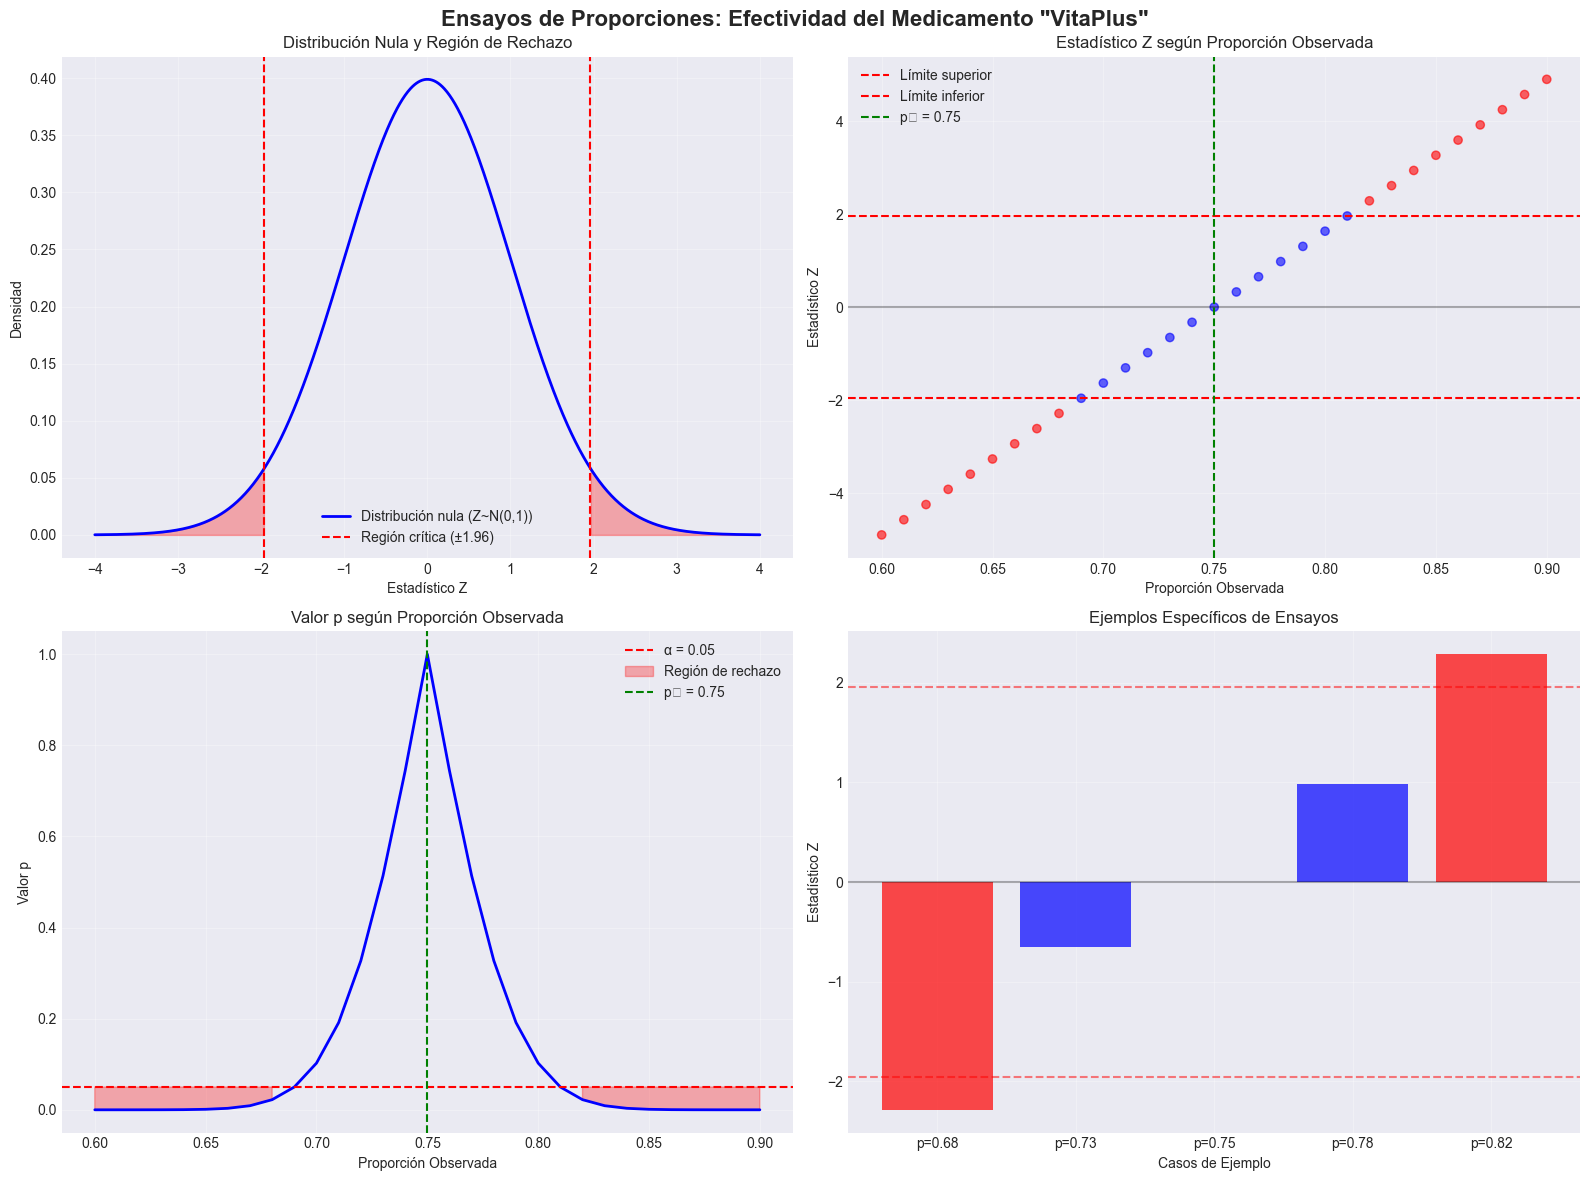

In [11]:
# Visualización de ensayos de proporciones
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Ensayos de Proporciones: Efectividad del Medicamento "VitaPlus"', fontsize=16, fontweight='bold')

# 1. Distribución nula y región de rechazo
x_z = np.linspace(-4, 4, 1000)
y_z = stats.norm.pdf(x_z)
z_critico = stats.norm.ppf(1 - alpha/2)

ax1.plot(x_z, y_z, 'b-', linewidth=2, label='Distribución nula (Z~N(0,1))')
ax1.axvline(-z_critico, color='red', linestyle='--', label=f'Región crítica (±{z_critico:.2f})')
ax1.axvline(z_critico, color='red', linestyle='--')
ax1.fill_between(x_z[x_z <= -z_critico], y_z[x_z <= -z_critico], alpha=0.3, color='red')
ax1.fill_between(x_z[x_z >= z_critico], y_z[x_z >= z_critico], alpha=0.3, color='red')
ax1.set_title('Distribución Nula y Región de Rechazo')
ax1.set_xlabel('Estadístico Z')
ax1.set_ylabel('Densidad')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Estadístico Z vs Proporción observada
colors = ['red' if sig else 'blue' for sig in df_ensayos['significativo']]
ax2.scatter(df_ensayos['p_observada'], df_ensayos['z_estadistico'], c=colors, alpha=0.6)
ax2.axhline(z_critico, color='red', linestyle='--', label='Límite superior')
ax2.axhline(-z_critico, color='red', linestyle='--', label='Límite inferior')
ax2.axhline(0, color='black', linestyle='-', alpha=0.3)
ax2.axvline(p_null, color='green', linestyle='--', label='p₀ = 0.75')
ax2.set_title('Estadístico Z según Proporción Observada')
ax2.set_xlabel('Proporción Observada')
ax2.set_ylabel('Estadístico Z')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Valor p vs Proporción observada
ax3.plot(df_ensayos['p_observada'], df_ensayos['p_valor'], 'b-', linewidth=2)
ax3.axhline(alpha, color='red', linestyle='--', label=f'α = {alpha}')
ax3.fill_between(df_ensayos['p_observada'], df_ensayos['p_valor'], alpha,
                where=(df_ensayos['p_valor'] < alpha), color='red', alpha=0.3,
                label='Región de rechazo')
ax3.axvline(p_null, color='green', linestyle='--', label='p₀ = 0.75')
ax3.set_title('Valor p según Proporción Observada')
ax3.set_xlabel('Proporción Observada')
ax3.set_ylabel('Valor p')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Casos específicos de ejemplo
casos_ejemplo = [0.68, 0.73, 0.75, 0.78, 0.82]
for i, p_caso in enumerate(casos_ejemplo):
    resultado_caso = ensayo_proporcion(n_pacientes, p_null, p_caso)
    color = 'red' if resultado_caso['significativo'] else 'blue'
    ax4.bar(i, resultado_caso['z_estadistico'], color=color, alpha=0.7,
            label=f'p={p_caso} ({"Rechazar" if resultado_caso["significativo"] else "No rechazar"} H₀)')

ax4.axhline(z_critico, color='red', linestyle='--', alpha=0.5)
ax4.axhline(-z_critico, color='red', linestyle='--', alpha=0.5)
ax4.axhline(0, color='black', linestyle='-', alpha=0.3)
ax4.set_title('Ejemplos Específicos de Ensayos')
ax4.set_xlabel('Casos de Ejemplo')
ax4.set_ylabel('Estadístico Z')
ax4.set_xticks(range(len(casos_ejemplo)))
ax4.set_xticklabels([f'p={p}' for p in casos_ejemplo])
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Tabla de casos específicos
print("\nEJEMPLOS ESPECÍFICOS DE ENSAYOS:")
print("-" * 80)
df_casos = pd.DataFrame()
for p_caso in casos_ejemplo:
    resultado = ensayo_proporcion(n_pacientes, p_null, p_caso)
    df_temp = pd.DataFrame({
        'Prop_Observada': [p_caso],
        'Z_Estadistico': [resultado['z_estadistico']],
        'Valor_p': [resultado['p_valor']],
        'Significativo': [resultado['significativo']],
        'Decision': ['Rechazar H₀' if resultado['significativo'] else 'No rechazar H₀']
    })
    df_casos = pd.concat([df_casos, df_temp], ignore_index=True)

df_casos.round(4)


EJEMPLOS ESPECÍFICOS DE ENSAYOS:
--------------------------------------------------------------------------------


,Prop_Observada,Z_Estadistico,Valor_p,Significativo,Decision
0,0.68,-2.2862,0.0222,True,Rechazar H₀
1,0.73,-0.6532,0.5136,False,No rechazar H₀
2,0.75,0.0000,1.0000,False,No rechazar H₀
3,0.78,0.9798,0.3272,False,No rechazar H₀
4,0.82,2.2862,0.0222,True,Rechazar H₀


## 3) Curvas de potencia para proporciones

Gráfico que nos muestra qué tan buena es nuestra prueba estadística para detectar cuando el porcentaje real es diferente al que estamos probando.

Nos ayuda a responder:
- Qué tan probable es que detectemos un problema si realmente existe?
- Cuál es la probabilidad de "no darnos cuenta" de un problema?

POTENCIA: la potencia de una prueba estadística es la probabilidad de rechazar correctamente una hipótesis nula Falsa.

$Potencia = P(rechazar\:H_0 | H_0\:es\:Falsa) = 1-β$

FUNCIÓN DE POTENCIA: nos da la probabilidad de rechazar H0 para cada valor posible de p.

$π(p) = P(\hat{p} \geq valorCritico | p\:es\:el\:valor\:verdadero) $

ó

$π(p) = P(\hat{p} \leq valorCritico | p\:es\:el\:valor\:verdadero) $

## Ejercicio 3: Optimización de ensayos clínicos

Un laboratorio quiere optimizar el diseño de sus ensayos críticos. Necesita entender cómo la potencia estadística (probabilidad de detectar una diferencia real) cambia según:
1. El tamaño de la muestra
2. El tamaño del efecto (diferencia real en proporciones)
3. El nivel de significancia

La potencia es crucial para determinar cuántos pacientes necesitan en sus estudios para detectar diferencias clínicamente imoprtantes.



In [13]:
# Función para calcular potencia
def calcular_potencia(n, p0, p1, alpha=0.05):
    """Calcula la potencia estadística para un ensayo de proporciones"""
    # Estadístico bajo H₀
    z_alpha = stats.norm.ppf(1 - alpha/2)  # Prueba bilateral

    # Estadístico bajo H₁
    se_h0 = np.sqrt(p0 * (1 - p0) / n)
    se_h1 = np.sqrt(p1 * (1 - p1) / n)

    # Límites críticos en términos de proporción
    limite_superior = p0 + z_alpha * se_h0
    limite_inferior = p0 - z_alpha * se_h0

    # Potencia (probabilidad de rechazar H₀ cuando H₁ es verdadera)
    z_superior = (limite_superior - p1) / se_h1
    z_inferior = (limite_inferior - p1) / se_h1

    potencia = stats.norm.cdf(z_inferior) + (1 - stats.norm.cdf(z_superior))

    return potencia

In [14]:
# Parámetros para análisis de potencia
p0_base = 0.5  # Proporción bajo H₀
tamaños_muestra = np.arange(10, 500, 10)
efectos = [0.1, 0.15, 0.2, 0.25, 0.3]  # Diferentes tamaños de efecto
niveles_alpha = [0.01, 0.05, 0.10]

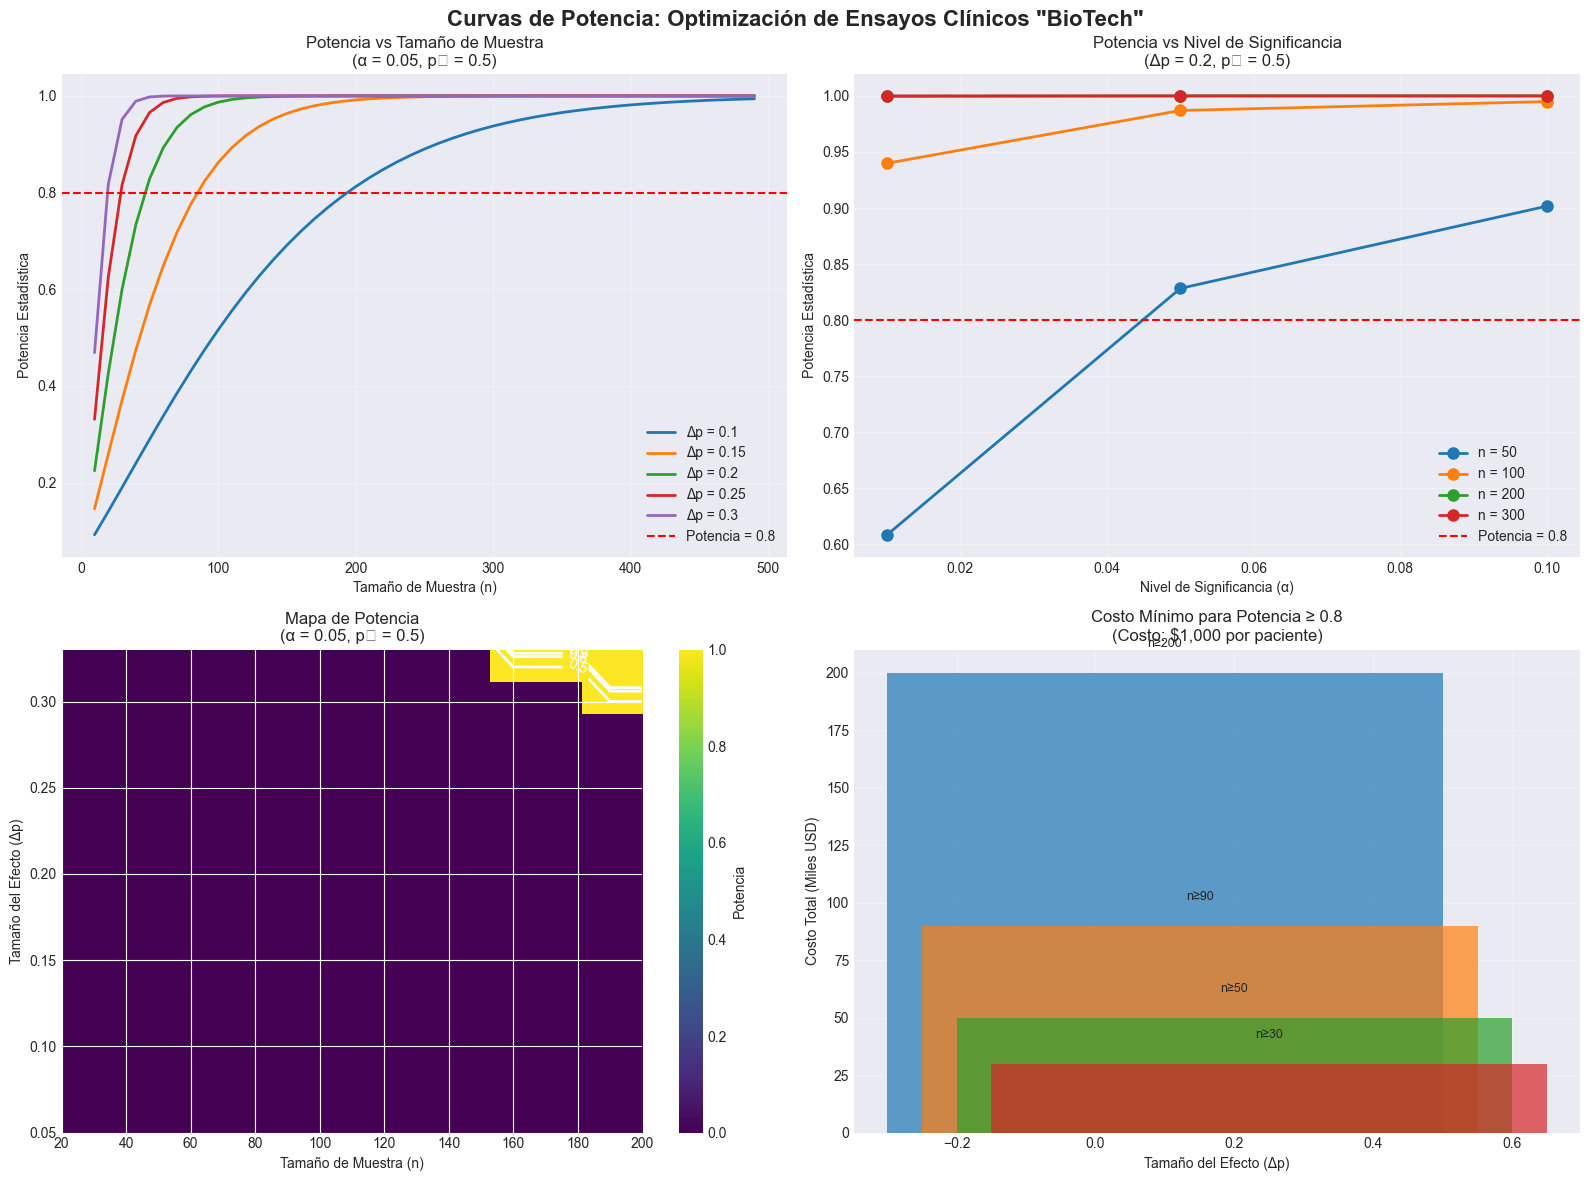

In [15]:
# Análisis 1: Potencia vs Tamaño de muestra
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Curvas de Potencia: Optimización de Ensayos Clínicos "BioTech"', fontsize=16, fontweight='bold')

# Curvas de potencia por tamaño de efecto
for efecto in efectos:
    p1 = p0_base + efecto
    potencias = [calcular_potencia(n, p0_base, p1) for n in tamaños_muestra]
    ax1.plot(tamaños_muestra, potencias, label=f'Δp = {efecto}', linewidth=2)

ax1.axhline(0.8, color='red', linestyle='--', label='Potencia = 0.8')
ax1.set_title('Potencia vs Tamaño de Muestra\n(α = 0.05, p₀ = 0.5)')
ax1.set_xlabel('Tamaño de Muestra (n)')
ax1.set_ylabel('Potencia Estadística')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Análisis 2: Potencia vs Nivel de significancia
tamaños_fijos = [50, 100, 200, 300]
efecto_fijo = 0.2

for n_fijo in tamaños_fijos:
    p1 = p0_base + efecto_fijo
    potencias_alpha = [calcular_potencia(n_fijo, p0_base, p1, alpha) for alpha in niveles_alpha]
    ax2.plot(niveles_alpha, potencias_alpha, 'o-', label=f'n = {n_fijo}', linewidth=2, markersize=8)

ax2.axhline(0.8, color='red', linestyle='--', label='Potencia = 0.8')
ax2.set_title('Potencia vs Nivel de Significancia\n(Δp = 0.2, p₀ = 0.5)')
ax2.set_xlabel('Nivel de Significancia (α)')
ax2.set_ylabel('Potencia Estadística')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Análisis 3: Mapa de calor - Potencia vs n y efecto
n_range = np.arange(20, 201, 10)
efecto_range = np.arange(0.05, 0.35, 0.02)
N, E = np.meshgrid(n_range, efecto_range)

potencia_matrix = np.zeros_like(N)
for i in range(len(efecto_range)):
    for j in range(len(n_range)):
        p1 = p0_base + efecto_range[i]
        potencia_matrix[i, j] = calcular_potencia(n_range[j], p0_base, p1)

im = ax3.imshow(potencia_matrix, cmap='viridis', aspect='auto', origin='lower',
                extent=[n_range.min(), n_range.max(), efecto_range.min(), efecto_range.max()])
contours = ax3.contour(N, E, potencia_matrix, levels=[0.5, 0.8, 0.9], colors='white', linewidths=2)
ax3.clabel(contours, inline=True, fontsize=10, fmt='%.1f')
ax3.set_title('Mapa de Potencia\n(α = 0.05, p₀ = 0.5)')
ax3.set_xlabel('Tamaño de Muestra (n)')
ax3.set_ylabel('Tamaño del Efecto (Δp)')
plt.colorbar(im, ax=ax3, label='Potencia')

# Análisis 4: Costo-beneficio del tamaño de muestra
costos_por_paciente = 1000  # Costo por paciente en USD
efectos_clinicos = [0.1, 0.15, 0.2, 0.25]

for efecto in efectos_clinicos:
    p1 = p0_base + efecto
    # Encontrar n mínimo para potencia ≥ 0.8
    potencias = [calcular_potencia(n, p0_base, p1) for n in tamaños_muestra]
    n_minimo = tamaños_muestra[np.where(np.array(potencias) >= 0.8)[0][0]]
    costo_total = n_minimo * costos_por_paciente

    ax4.bar(efecto, costo_total/1000, alpha=0.7,
            label=f'Δp={efecto}, n≥{n_minimo}')
    ax4.text(efecto, costo_total/1000 + 10, f'n≥{n_minimo}',
             ha='center', va='bottom', fontsize=9)

ax4.set_title('Costo Mínimo para Potencia ≥ 0.8\n(Costo: $1,000 por paciente)')
ax4.set_xlabel('Tamaño del Efecto (Δp)')
ax4.set_ylabel('Costo Total (Miles USD)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
# Tabla de recomendaciones de tamaño de muestra
print("\nRECOMENDACIONES DE TAMAÑO DE MUESTRA:")
print("-" * 70)
df_recomendaciones = pd.DataFrame()

for efecto in efectos:
    p1 = p0_base + efecto
    potencias = [calcular_potencia(n, p0_base, p1) for n in tamaños_muestra]

    # Encontrar n para diferentes niveles de potencia
    try:
        n_80 = tamaños_muestra[np.where(np.array(potencias) >= 0.8)[0][0]]
    except:
        n_80 = ">500"

    try:
        n_90 = tamaños_muestra[np.where(np.array(potencias) >= 0.9)[0][0]]
    except:
        n_90 = ">500"

    df_temp = pd.DataFrame({
        'Efecto_Δp': [efecto],
        'p₁': [p1],
        'n_para_80%': [n_80],
        'n_para_90%': [n_90],
        'Costo_80%_k$': [n_80 * costos_por_paciente / 1000 if n_80 != ">500" else ">500"],
        'Costo_90%_k$': [n_90 * costos_por_paciente / 1000 if n_90 != ">500" else ">500"]
    })
    df_recomendaciones = pd.concat([df_recomendaciones, df_temp], ignore_index=True)

print(df_recomendaciones)


RECOMENDACIONES DE TAMAÑO DE MUESTRA:
----------------------------------------------------------------------
   Efecto_Δp    p₁  n_para_80%  n_para_90%  Costo_80%_k$  Costo_90%_k$
0       0.10  0.60         200         260         200.0         260.0
1       0.15  0.65          90         120          90.0         120.0
2       0.20  0.70          50          70          50.0          70.0
3       0.25  0.75          30          40          30.0          40.0
4       0.30  0.80          20          30          20.0          30.0



PARTE 4: ANÁLISIS DE SENSIBILIDAD

ANÁLISIS FINAL: Comparación de Escenarios

Vamos a comparar cómo diferentes parámetros afectan nuestros análisis
en los tres contextos: panadería, farmacéutica y laboratorio.



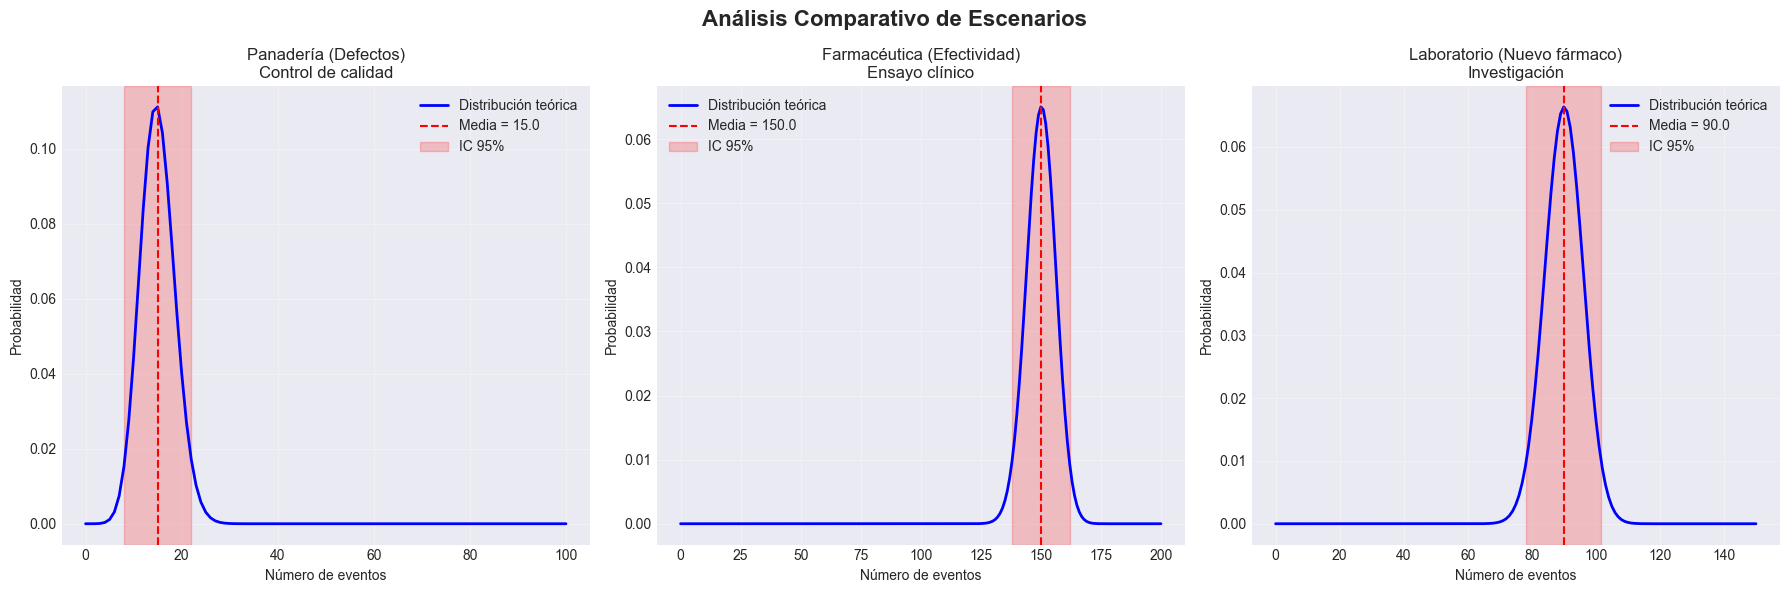

In [17]:
# ==========================================
# PARTE 4: ANÁLISIS DE SENSIBILIDAD
# ==========================================

print("\n" + "="*50)
print("PARTE 4: ANÁLISIS DE SENSIBILIDAD")
print("="*50)

print("""
ANÁLISIS FINAL: Comparación de Escenarios

Vamos a comparar cómo diferentes parámetros afectan nuestros análisis
en los tres contextos: panadería, farmacéutica y laboratorio.
""")

# Función para análisis comparativo
def analisis_comparativo():
    """Realiza un análisis comparativo de diferentes escenarios"""

    # Escenarios
    escenarios = {
        'Panadería (Defectos)': {'p': 0.15, 'n': 100, 'contexto': 'Control de calidad'},
        'Farmacéutica (Efectividad)': {'p': 0.75, 'n': 200, 'contexto': 'Ensayo clínico'},
        'Laboratorio (Nuevo fármaco)': {'p': 0.60, 'n': 150, 'contexto': 'Investigación'}
    }

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Análisis Comparativo de Escenarios', fontsize=16, fontweight='bold')

    for i, (nombre, params) in enumerate(escenarios.items()):
        ax = axes[i]

        # Distribución binomial
        x = np.arange(0, params['n'] + 1)
        y = binom.pmf(x, params['n'], params['p'])

        # Gráfico
        ax.plot(x, y, 'b-', linewidth=2, label='Distribución teórica')

        # Intervalo de confianza 95%
        media = params['n'] * params['p']
        desv = np.sqrt(params['n'] * params['p'] * (1 - params['p']))
        ic_inf = max(0, media - 1.96 * desv)
        ic_sup = min(params['n'], media + 1.96 * desv)

        ax.axvline(media, color='red', linestyle='--', label=f'Media = {media:.1f}')
        ax.axvspan(ic_inf, ic_sup, alpha=0.2, color='red', label='IC 95%')

        ax.set_title(f'{nombre}\n{params["contexto"]}')
        ax.set_xlabel('Número de eventos')
        ax.set_ylabel('Probabilidad')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return escenarios

escenarios = analisis_comparativo()

# Consignas

## Consigna 1 – Proceso de Bernoulli - Fábrica de semiconductores
La empresa TechChip produce microchips para smartphones. El proceso de fabricación es complejo y cada chip puede ser clasificado como "funcional" o "defectuoso". Según datos históricos, la probabilidad de que un chip sea defectuoso es del 8%.

La fábrica produce chips en lotes de diferentes tamaños según el pedido del cliente:
- Lote A: 25 chips
- Lote B: 100 chips
- Lote C: 400 chips

CONSIGNA: utilizando el proceso de Bernoulli, analizar la producción de chips defectuosos en los tres tipos de lotes.

1. Modelado teórico:
  - Definir claramente el experimento de Bernoulli en este contexto
  - Calcular la media y varianza esperada de chips defectuosos para cada lote
  - Determinar la probabilidad de que un lote A tenga exactamente 0,1,2 y 3 chips defectuosos
2. Simulación y comparación:
  - Simular 1000 lotes de cada tipo
  - Comparar las distribuciones simuladas con las teóricas
  - Graficar histogramas para cada tipo de lote
3. Análisis de variabilidad:
  - Calcular el coeficiente de variación ($CV=σ/μ$) para cada tipo de lote
  - Explicar por qué el CV cambia con el tamaño de lote

PREGUNTAS DE INTERPRETACIÓN:

a) Si la empresa considera "aceptable" un lote con máximo 5% de defectuosos, cuál es la probabilidad de que cada tipo de lote sea rechazado?

b) Un cliente importante quiere que un 99% de sus pedidos tengan menos de 10 chips defectuosos. Qué tamaño de lote recomendaría y por qué?

c) Si en un lote B se observan 15 chips defectuosos, qué tan inusual es esete resultado? Sugirirías investigar el proceso de producción?

d) Explicar por qué la variabilidad relativa disminute con lotes más grandes y las implicaciones para el control de calidad.

In [16]:
# Parámetros del proceso de Bernoulli
p_defecto = 0.08  # Probabilidad de chips defectuosos
n_produccion = [25, 100, 400]  # Diferentes tamaños de lote

In [17]:
# Función para simular proceso de Bernoulli
# Simula múltiples repeticiones de un proceso de Bernoulli
def simular_bernoulli(n, p, num_simulaciones=1000):
    """Simula un proceso de Bernoulli"""
    resultados = []
    for _ in range(num_simulaciones):
        ensayos = np.random.binomial(1, p, n)  # se generan n ensayos de Bernoulli
        exitos = np.sum(ensayos)
        resultados.append(exitos)
    return np.array(resultados)

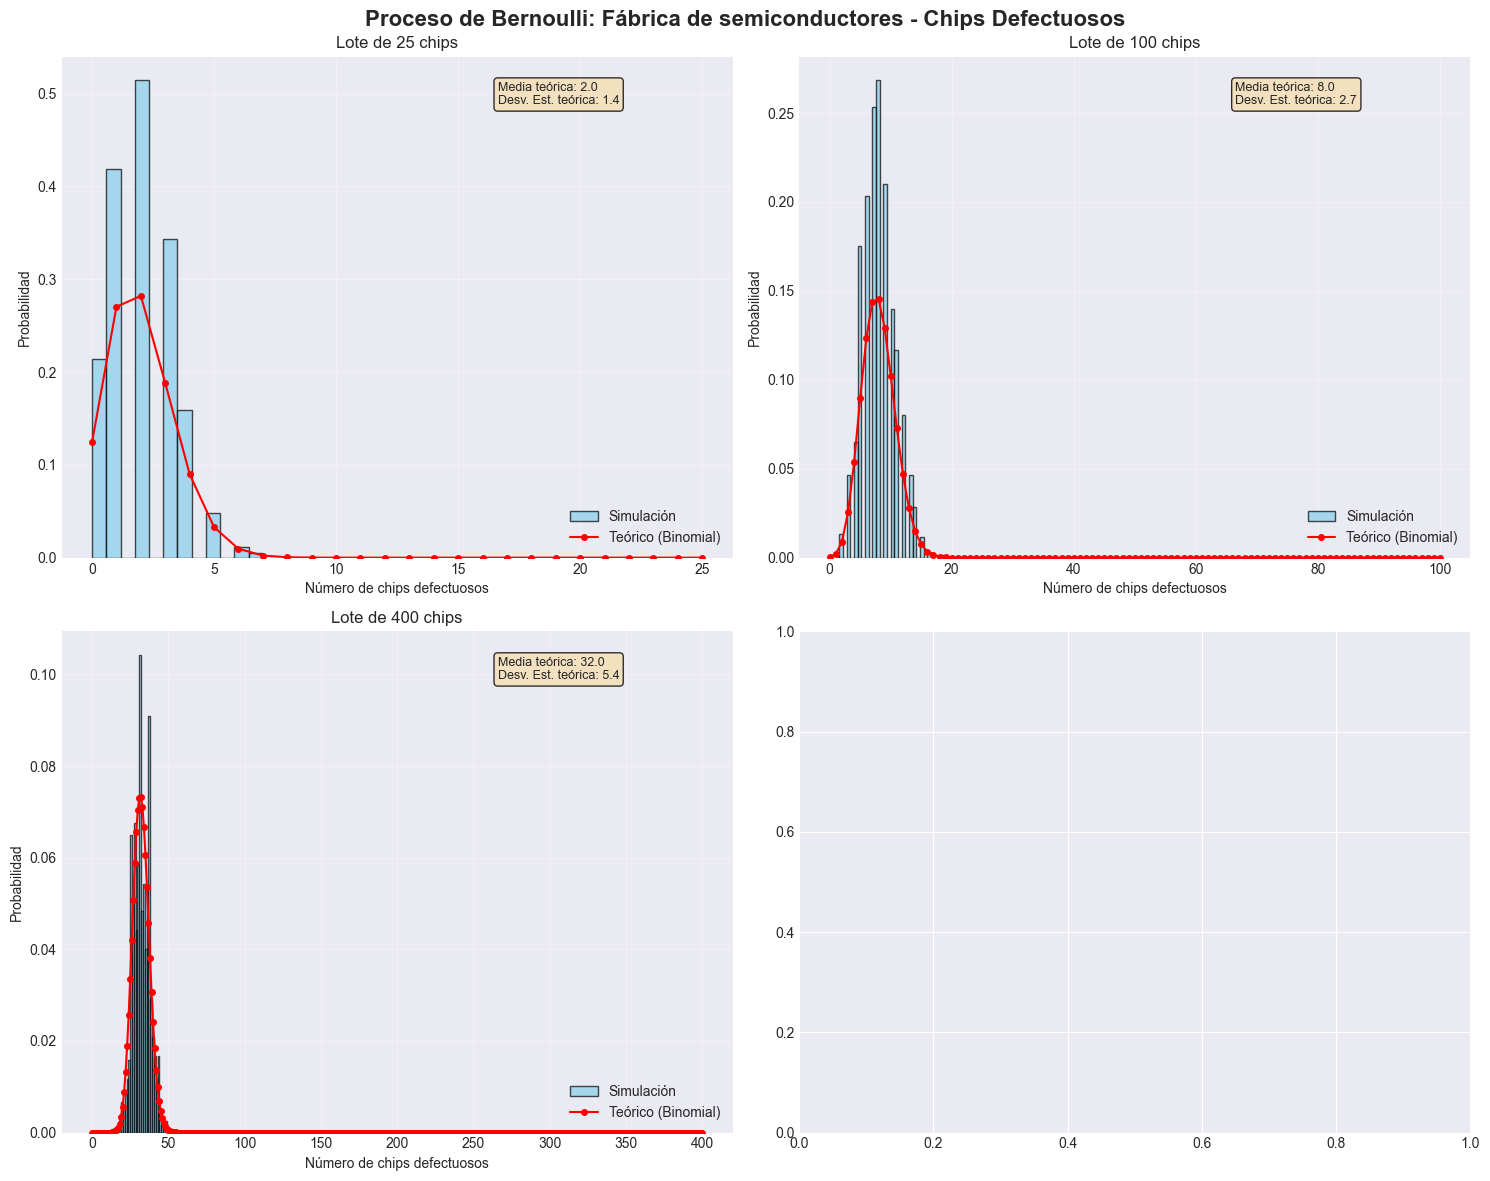

In [21]:
# Análisis teórico vs simulación
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Proceso de Bernoulli: Fábrica de semiconductores - Chips Defectuosos', fontsize=16, fontweight='bold')

for i, n in enumerate(n_produccion):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    # Simulación
    # Llama a la función simular_bernoulli para obtener 1000 simulaciones
    # Cada simulación cuenta éxitos en n ensayos con probabilidad p_defecto
    simulacion = simular_bernoulli(n, p_defecto)

    # Distribución teórica (Binomial)
    x_teorico = np.arange(0, n + 1)
    prob_teorica = binom.pmf(x_teorico, n, p_defecto)

    # Gráfico
    ax.hist(simulacion, bins=min(30, n//2), density=True, alpha=0.7,
            color='skyblue', label='Simulación', edgecolor='black')
    ax.plot(x_teorico, prob_teorica, 'ro-', label='Teórico (Binomial)', markersize=4)

    ax.set_title(f'Lote de {n} chips')
    ax.set_xlabel('Número de chips defectuosos')
    ax.set_ylabel('Probabilidad')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Estadísticas
    media_teorica = n * p_defecto
    varianza_teorica = n * p_defecto * (1 - p_defecto)

    textstr = f'Media teórica: {media_teorica:.1f}\nDesv. Est. teórica: {np.sqrt(varianza_teorica):.1f}'
    ax.text(0.65, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()


In [26]:
# Tabla resumen de resultados
print("\nRESULTADO ANÁLISIS PROCESO DE BERNOULLI:")
print("-" * 60)
df_bernoulli = pd.DataFrame()
for n in n_produccion:
    simulacion = simular_bernoulli(n, p_defecto)
    media_sim = np.mean(simulacion)
    desv_sim = np.std(simulacion)
    media_teorica = n * p_defecto
    desv_teorica = np.sqrt(n * p_defecto * (1 - p_defecto))

    df_temp = pd.DataFrame({
        'Tamaño_Lote': [n],
        'Media_Simulada': [media_sim],
        'Media_Teórica': [media_teorica],
        'Desv_Simulada': [desv_sim],
        'Desv_Teórica': [desv_teorica],
        'Error_Media': [abs(media_sim - media_teorica)],
        'Prob_Cero_Defectos': [binom.pmf(0, n, p_defecto)],
        'Prob_Un_Defecto': [binom.pmf(1, n, p_defecto)],
        'Prob_Dos_Defectos': [binom.pmf(2, n, p_defecto)],
        'Prob_Tres_Defectos': [binom.pmf(3, n, p_defecto)],
        'CV': [desv_sim / media_sim]
    })
    df_bernoulli = pd.concat([df_bernoulli, df_temp], ignore_index=True)

print(df_bernoulli.round(4))


RESULTADO ANÁLISIS PROCESO DE BERNOULLI:
------------------------------------------------------------
   Tamaño_Lote  Media_Simulada  Media_Teórica  Desv_Simulada  Desv_Teórica  \
0           25           1.996            2.0         1.3327        1.3565   
1          100           8.107            8.0         2.7415        2.7129   
2          400          31.893           32.0         5.2356        5.4259   

   Error_Media  Prob_Cero_Defectos  Prob_Un_Defecto  Prob_Dos_Defectos  \
0        0.004              0.1244           0.2704             0.2821   
1        0.107              0.0002           0.0021             0.0090   
2        0.107              0.0000           0.0000             0.0000   

   Prob_Tres_Defectos      CV  
0              0.1881  0.6677  
1              0.0254  0.3382  
2              0.0000  0.1642  


El coeficiente de variación mide la variabilidad relativa (desviación estándar en proporción a la media). Aunque ambos, la media y la desviación estándar, crecen con 𝑛, la media crece más rápido (linealmente con 𝑛), mientras que la desviación estándar crece más lentamente (con la raíz cuadrada de 𝑛).

Por tanto:
    A mayor tamaño de lote, menor es la variabilidad relativa.
    El proceso se vuelve más predecible y estable en términos proporcionales.
    Esto tiene sentido en contextos de control de calidad: en lotes grandes, la proporción de defectos varía menos en términos relativos.

A)
Interpretación: Aunque parezca contraintuitivo, con 𝑝 = 0.08, todos los lotes tienen alta probabilidad de ser rechazados porque el límite del 5% es más estricto que el promedio esperado (8%). Esto muestra que el proceso actual no cumple el estándar.

B)
Para esta encomendacion es preferible utilizar los lotes mas pequeños posibles, debido a que el 1% en cantidades pequeñas representa menos en terminos absolutos.

C) 
En caso de observar 15 fallas se deberia parar el proceso productivo. A pesar de que no es inusual ver esa cifra de defectos en mas comun encontrar entre 8 y 12. Siendo 15 un numero alejado de la media de fallos. 

D)
En lotes grandes, los porcentajes de defectos son más estables y predecibles.
En lotes pequeños, hay más variación aleatoria, por lo que puede parecer que hay "problemas" donde no los hay.
El control de calidad debe tener esto en cuenta: aplicar límites de aceptación proporcionales al tamaño del lote.

## Consigna 2 – Ensayos sobre proporciones - Campaña de seguridad vial
El Ministerio de Transporte implementó una nueva campaña de concientización sobre el uso del cinturón de seguridad. Antes de la campaña, estudios indicaban que el 65% de los conductores usaban cinturón de seguridad regularmente.

Después de 6 meses de campaña, se realizó un estudio observacional en 5 ubicaciones diferentes de la ciudad, registrando el comportamiento de 800 consuctores elegidos aleatoriamente. Se observó que 552 conductores usaban cinturón de seguridad.

CONSIGNA: evaluar estadísticamente si la campaña ha sido efectiva para aumentar el uso del cinturón de seguridad.

1. Planteo de hipótesis:
  - Formular claramente las hipótesis nula y alternativa
  - Justificar si se debe usar una prueba unilateral o bilateral
  - Establecer el nivel de significancia apropiado
2. Cálculos estadísticos:
  - Calcular la proporción muestral observada
  - Determinar el estadístico de prueba Z
  - Calcular el valor p correspondiente
  - Establecer la región crítica
3. Análisis de sensibilidad:
  - Cómo cambiaría la conclusión si el tamaño de muestra fuera n=400 con la misma proporción observada?
  - Qué pasaría si usara $α=0,01$ en lugar de $α=0,05$?

PREGUNTAS DE INTERPRETACIÓN:

a) Con base en los cálculos, se puede concluir que la campaña fue efectiva? Justificar.

b) Si la diferencia observada fuera estadísticamente significativa pero la mejora fuera solo del 2%, considerarías esto un éxito práctico? Por qué?

c) Construir un intervalo de confianza del 95% para la verdadera proporción post-campaña. Qué información adicional proporciona este intervalo que no da la prueba de hipótesis?

d) Qué limitaciones ves en el diseño de este estudio? Qué factores confusores podrían afectar las conculsiones?

e) Como consultor estadístico, qué recomendarías al Ministerio para futuros estudios de efectividad?

## Consigna 2 – Prueba de Hipótesis

Queremos evaluar si la proporción de éxito ha **aumentado** respecto al valor histórico de 0.65.

### Hipótesis:

- **Hipótesis nula** \( H_0 \):  
  \( p <= 0.65 \)  
  _(la proporción es igual o menor al 65%)_

- **Hipótesis alternativa** \( H_1 \):  
  \( p > 0.65 \)  
  _(la proporción ha aumentado respecto al 65%)_

---

### Tipo de prueba:

- Prueba **unilateral (cola derecha)** porque nos interesa saber si la proporción **es mayor** al valor de referencia.


In [41]:
# Parámetros del ensayo
n_pacientes = 800
x_exitos = 552
p_observada = x_exitos / n_pacientes  # 552 / 800 = 0.69
p_null = 0.65  # Proporción bajo H₀
alpha = 0.05   # Nivel de significancia

In [55]:
# Función para realizar ensayo de proporciones
def ensayo_proporcion(n, p_null, p_observada, alpha=0.05):
    """Realiza un ensayo de hipótesis para una proporción"""
    # Estadístico de prueba
    z = (p_observada - p_null) / np.sqrt(p_null * (1 - p_null) / n)


    # Valor crítico (unilateral)
    z_critico = stats.norm.ppf(1 - alpha)

    # p-valor (cola derecha)
    p_valor = 1 - stats.norm.cdf(z)

    # Decisión
    rechazar_h0 = z > z_critico
    return {
        'z_estadistico': z,
        'z_critico': z_critico,
        'p_valor': p_valor,
        'rechazar_h0': rechazar_h0,
        'significativo': p_valor < alpha
    }

In [56]:
# Simular diferentes escenarios de efectividad observada
proporciones_observadas = np.arange(0.60, 0.90, 0.01)
resultados_ensayos = []

for p_obs in proporciones_observadas:
    resultado = ensayo_proporcion(n_pacientes, p_null, p_obs, alpha)
    resultados_ensayos.append({
        'p_observada': p_obs,
        'z_estadistico': resultado['z_estadistico'],
        'p_valor': resultado['p_valor'],
        'significativo': resultado['significativo']
    })

df_ensayos = pd.DataFrame(resultados_ensayos)
df_ensayos.head()

,p_observada,z_estadistico,p_valor,significativo
0,0.60,-2.964997,0.998487,False
1,0.61,-2.371998,0.991154,False
2,0.62,-1.778998,0.962380,False
3,0.63,-1.185999,0.882189,False
4,0.64,-0.592999,0.723409,False


In [61]:
# Cálculos
std_error = np.sqrt(p_null * (1 - p_null) / n)
z = (p_observada - p_null) / std_error
z_critico = stats.norm.ppf(1 - alpha)
p_valor = 1 - stats.norm.cdf(z)

# Resultados
print(f"Proporción observada: {p_observada:.4f}")
print(f"Estadístico Z: {z:.4f}")
print(f"Valor crítico Z: {z_critico:.4f}")
print(f"p-valor: {p_valor:.4f}")

if z > z_critico:
    print("Rechazamos la hipótesis nula: la proporción ha aumentado.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar aumento.")

Proporción observada: 1.3800
Estadístico Z: 30.6099
Valor crítico Z: 1.6449
p-valor: 0.0000
Rechazamos la hipótesis nula: la proporción ha aumentado.


## EN CASO QUE FUESE N = 400

In [64]:
# Parámetros del ensayo
n_pacientes = 400
p_observada = 0.69
p_null = 0.65  # Proporción bajo H₀
alpha = 0.05   # Nivel de significancia

In [65]:
# Cálculos
std_error = np.sqrt(p_null * (1 - p_null) / n)
z = (p_observada - p_null) / std_error
z_critico = stats.norm.ppf(1 - alpha)
p_valor = 1 - stats.norm.cdf(z)

# Resultados
print(f"Proporción observada: {p_observada:.4f}")
print(f"Estadístico Z: {z:.4f}")
print(f"Valor crítico Z: {z_critico:.4f}")
print(f"p-valor: {p_valor:.4f}")

if z > z_critico:
    print("Rechazamos la hipótesis nula: la proporción ha aumentado.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar aumento.")

Proporción observada: 0.6900
Estadístico Z: 1.6773
Valor crítico Z: 1.6449
p-valor: 0.0467
Rechazamos la hipótesis nula: la proporción ha aumentado.


Cuando disminuimos el tamaño de la muestra, el error estándar aumenta, lo que reduce el estadístico Z calculado. Esto puede llevar a que el estadístico Z no alcance el valor crítico necesario para rechazar la hipótesis nula, incluso si existe una diferencia real.

## Consigna 3 – Curvas de Potencia - Programa educativo Universitario
Una Universidad desarrolló un programa innovador para mejorar las habilidades matemáticas de los estudiantes.

Actualmtente, el 40% de los estudiantes aprueban el examen de matemática en el primer intento. Los investigadores creen que este programa educativo puede aumentar esta tasa de aprobación, pero necesitan diseñar un estudio para demostrarlo.

El comité de ética solo aprobará el estudio si tiene al menos 80% de potencia para detectar una mejora mínima del 10% en la tasa de aprobación (es decir, del 40% a 50%). El presupuesto permite incluir máximo 300 estudiantes en el estudio.

CONSIGNA: diseñar el estudio óptimo evaluando diferentes escenarios de potencia estadística.

1. Análisis de Potencia:
  - Calcular la potencia para detectar una mejora del 10% con $n=300\:y\:α=0,05$
  - Determinar el tamaño de muestra mínimo para lograr 80% de potencia detectando esta diferencia
  - Graficar la curva de potencia vs. tamaño de muesra para este efecto
2. Análisis multi-escenario:
  - Evaluar la potencia para detectar mejoras del 5%, 10%, 15% y 20%
  - Para cada escenario, determinar el n mínimo para 80% de potencia
  - Crear un mapa de calor: potencia vs. (tamaño muestra, tamaño efecto)
3. Análisis costo-efectividad:
  - Cada estudiante en el estudio cuesta $200
  - El programa completo costaría $50.000 en desarrollo
  Evaluar el costo total por escenario y recomendar el diseño óptimo

PREGUNTAS DE INTERPRETACIÓN:

a) Es viable detectar una mejora del 10% con el presupuesto disponible? Si no, qué alternativas propondrías?

b) Comparar los escenarios de detectar mejoras del 5% vs 15%. Cuáles son las implicaciones prácticas y estadísticas de ada opción?

c) Si el programa realmente mejora la tasa al 50% pero el estudio concluye que no hay diferencia, cuáles serían las consecuencias? Cómo minimizarías este riesgo?

d) Cuál considerás que sería la mínima diferenica clínicamente importante en este contexto? Por qué?

e) Si pudieras modificar el diseño del estudio (no solo el tamaño de muestra), qué cambios propondrías para maximizar la potencia manteniendo la validez?

f) Como consultor, redactá una recomendación corta (4-5 líneas) para el comité universitario sobre el diseño óptimo del estudio